<a href="https://colab.research.google.com/github/lucvseco/algoritmo-supervisionado/blob/main/riscoGravidez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CONTEXTO:**
Avaliando o melhor modelo para decidir o risco de gravidez.



#**Importando bibliotecas**




In [ ]:
# biblioteca para manipulação de dados
import pandas as pd
import numpy as np
# bibliotecas para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# técnica de partição em treino e teste
from sklearn.model_selection import train_test_split
#Importanto técnicas de avaliação de modelos
from sklearn.metrics import accuracy_score  #métrica acurácia
from sklearn.metrics import confusion_matrix  #árvore de confusão
from sklearn.metrics import classification_report #várias métricas
# Importando as técnicas de aprendizagem (Classificadores)
from sklearn.tree import DecisionTreeClassifier # técnica árvore de decisão
from sklearn.svm import SVC  #técnica SVM
from sklearn.neighbors import KNeighborsClassifier # técnica KNN

#**Importação dos dados**

In [ ]:
base_classificacao = pd.read_csv("/content/riscoGravidez.csv", sep=',')
base_classificacao.head()

,idade,pressaoSup,pressaoInf,glicose,tempCorpoF,freqCardio,nivelRisco
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,2


**Descrição dos Dados**

-Idade: Idade em anos de uma paciente grávida.

-pressaoSup: Valor superior da pressão arterial em mmHg.

-pressaoInf: Menor valor da Pressão Arterial em mmHg.

-glicose: Os níveis de glicose no sangue são em termos de concentração.

-tempCorpoF: Temperatura corporal em °F

-freqCardio: Uma frequência cardíaca normal em repouso em batimentos por minuto.

-Nível de Risco: Nível de Intensidade de Risco Previsto durante a gravidez.

     0 = Alto risco
     1 = Risco médio
     2 = Baixo risco

# **Seção 1: Caracterização dos Dados**

In [ ]:
# Distribuição da variável resposta
num_categorias = base_classificacao['nivelRisco'].value_counts()
print(num_categorias)

2    406
1    336
0    272
Name: nivelRisco, dtype: int64


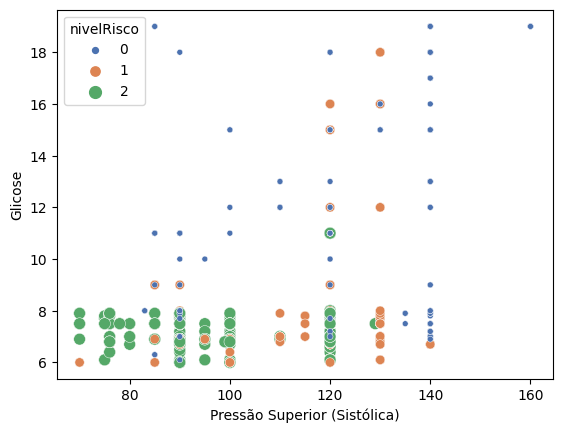

In [ ]:
# Gráfico de dispersão: relacionando glicose e pressão pelo nível de risco.
sns.scatterplot(data=base_classificacao, x="pressaoSup", y="glicose", hue="nivelRisco", palette="deep", size="nivelRisco")
plt.xlabel("Pressão Superior (Sistólica)")
plt.ylabel("Glicose")
plt.show()

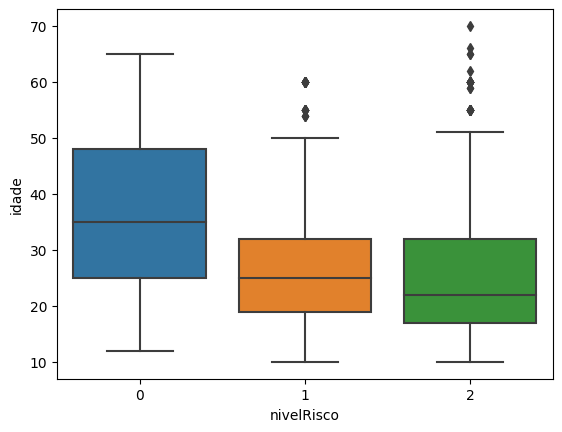

In [ ]:
sns.boxplot(x='nivelRisco', y='idade',data=base_classificacao)
plt.show()

In [ ]:
Y = base_classificacao['nivelRisco']
X = base_classificacao.drop('nivelRisco', axis=1)

### **Seção 2:Treinando e testando modelos de classificação**

In [ ]:
resultados_modelo1 = []
resultados_modelo2 = []
resultados_modelo3 = []

# definindo uma semente global
np.random.seed(7)

# início do processo iterativo
for i in range(100):

  # Separação aleatória em conjuntos de treino e teste
  X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size=0.75)

  ###### Treinamento de modelos #####
  # Modelo 1 =  KNN
  model1 = KNeighborsClassifier(n_neighbors=3)
  model1.fit(X_treino, Y_treino)

  # Modelo 2 =  SVM
  model2 = SVC()
  model2.fit(X_treino, Y_treino)

  # Modelo 2 =  Árvore de Decisão
  model3 = DecisionTreeClassifier()
  model3.fit(X_treino, Y_treino)

  ##### Avaliação de Modelos ######
  # Estimativas na base de teste (dados não vistos/futuros)/guardando resultados nas listas
  predictions1 = model1.predict(X_teste)
  resultados_modelo1.append(accuracy_score(Y_teste, predictions1))

  predictions2 = model2.predict(X_teste)
  resultados_modelo2.append(accuracy_score(Y_teste, predictions2))

  predictions3 = model3.predict(X_teste)
  resultados_modelo3.append(accuracy_score(Y_teste, predictions3))

#**Seção 3: Avaliando os modelos**

In [ ]:
print('Média modelo 1 / Média modelo 2 / Média modelo 3:')
print(round(np.mean(resultados_modelo1),2), round(np.mean(resultados_modelo2),2), round(np.mean(resultados_modelo3),2),'\n')

print('Desvio padrão modelo 1 / Desvio padrão modelo 2 / Desvio padrão modelo 3:')
print(round(np.std(resultados_modelo1),2), round(np.std(resultados_modelo2),2), round(np.std(resultados_modelo3),2))

Média modelo 1 / Média modelo 2 / Média modelo 3:
0.71 0.59 0.83 

Desvio padrão modelo 1 / Desvio padrão modelo 2 / Desvio padrão modelo 3:
0.03 0.03 0.02


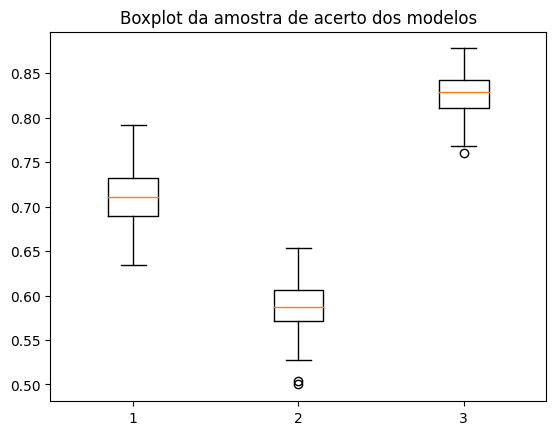

In [ ]:
# Execute este códido para visualizar o boxplot para cada modelo.
dados_resultados =[resultados_modelo1, resultados_modelo2, resultados_modelo3]

plt.boxplot(dados_resultados)
plt.title("Boxplot da amostra de acerto dos modelos")
plt.show()

In [ ]:
print(classification_report(Y_teste, predictions1), '\n')
print(classification_report(Y_teste, predictions2), '\n')
print(classification_report(Y_teste, predictions3))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        70
           1       0.68      0.72      0.70        93
           2       0.73      0.70      0.72        91

    accuracy                           0.73       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.73      0.73      0.73       254
 

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        70
           1       0.66      0.23      0.34        93
           2       0.52      0.95      0.67        91

    accuracy                           0.62       254
   macro avg       0.70      0.63      0.60       254
weighted avg       0.68      0.62      0.59       254
 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        70
           1       0.76      0.84      0.80        93
           2       0.84      0.76      0.80        91

    accuracy    